# Data Exploration

### 1. Data Summary and Explanation

#### Data Explanation
- The dataset contains information about a Bank's Telemarketing campaign, which aims to promote a term deposit among existing customers. The dataset is publicly available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
    - I will be using a slightly modified version of the dataset, which has some additional features pertaining to the economy. 
- We will use this dataset to build a model that can predict whether a customer will subscribe to a term deposit, based on the information provided in the dataset.
- We will also try to gain some insights into how successful the campaign was, and what factors contributed to the success or failure of the campaign.



In [1]:
import pandas as pd
import plotly
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix




2023-10-14 21:06:03.069298: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-14 21:06:03.195899: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-14 21:06:03.195975: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-14 21:06:03.196130: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-14 21:06:03.244143: I tensorflow/core/platform/cpu_feature_g

In [2]:
bank_data = pd.read_csv("bank.csv")





data_info = bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      37069 non-null  int64  
 1   age             37069 non-null  int64  
 2   job             37069 non-null  object 
 3   marital         37069 non-null  object 
 4   education       37069 non-null  object 
 5   default         37069 non-null  object 
 6   housing         37069 non-null  object 
 7   loan            37069 non-null  object 
 8   contact         37069 non-null  object 
 9   month           37069 non-null  object 
 10  day_of_week     37069 non-null  object 
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  object 
 15  emp.var.rate    37069 non-null  float64
 16  cons.price.idx  37069 non-null  float64
 17  cons.conf.idx   37069 non-null 

In [3]:


data_describe = bank_data.describe()

data_describe


,Unnamed: 0,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,18534.000000,40.025493,2.564407,962.221803,0.173730,0.081526,93.576551,-40.494829,3.621945,5167.010650
std,10701.042901,10.435288,2.764084,187.531477,0.496159,1.572287,0.579339,4.628895,1.734496,72.294476
min,0.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,9267.000000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,18534.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,27801.000000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,37068.000000,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:

data_head = bank_data.head()

data_head



,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
missing_values = bank_data.apply(lambda x: x[x == 'unknown'].count())

missing_values

Unnamed: 0           0
age                  0
job                294
marital             69
education         1535
default           7725
housing            894
loan               894
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

#### Basic Overview
- What do we know about the data?
    - The dataset consists of **37,069 entries** and **20 columns**.
    - The data contains both numerical and categorical variables, each providing different kinds of information about the customers and the campaign.

#### Variables
- **Client Data**: Age, job type, marital status, education level, and whether the client has credit in default, a housing loan, or a personal loan.
  
- **Last Contact Data**: Information about the last contact during the campaign includes the communication type, month, and day of the week of contact.

- **Campaign Data**: Contains numerical data regarding the number of contacts performed during the campaign (`campaign`), the number of days since the client was last contacted from a previous campaign (`pdays`), and the number of contacts performed before this campaign (`previous`). It also has categorical data about the outcome of the previous marketing campaign (`poutcome`).

- **Socio-Economic Context**: Features like employment variation rate, consumer price index, consumer confidence index, euribor 3 month rate, and number of employees give insight into the economic context during the Bank's Telemarketing campaign.

- **Target Variable**: The `y` column indicates whether the client subscribed to a term deposit (binary: "yes","no").

#### Missing Values
- Some categorical variables like `job`, `marital`, `education`, `default`, `housing`, and `loan` contain "unknown" entries, which need to be addressed during preprocessing.


In [6]:




target_distribution = bank_data['y'].value_counts(normalize=True) * 100
target_distribution



y
no     88.648197
yes    11.351803
Name: proportion, dtype: float64

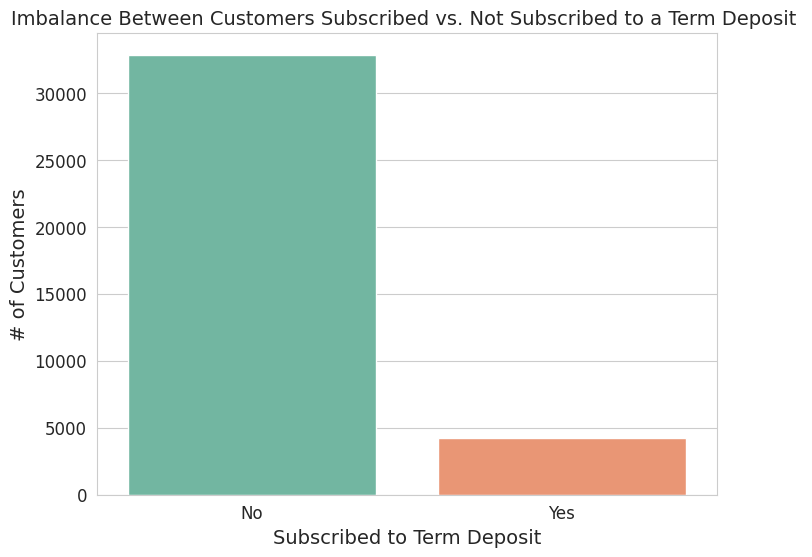

In [7]:
sns.set_style("whitegrid")


plt.figure(figsize=(8, 6))



sns.countplot(x='y', data=bank_data, palette="Set2", hue='y')




plt.title('Imbalance Between Customers Subscribed vs. Not Subscribed to a Term Deposit ', fontsize=14)

plt.xlabel('Subscribed to Term Deposit', fontsize=14)

plt.ylabel('# of Customers', fontsize=14)

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=12)

plt.yticks(fontsize=12)




plt.show()

#### Target Variable Imbalance
- The target variable `y` is imbalanced, with "no" constituting **88.65%** and "yes" making up **11.35%** of the entries.
    - Below is a bar chart showing the imbalance of the target variable.


# Data Preprocessing

In [8]:
for column in ['job', 'marital', 'housing', 'loan']:
    mode_val = bank_data[column].mode()[0]
    bank_data[column].replace('unknown', mode_val, inplace=True)




categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
bank_data_encoded = pd.get_dummies(bank_data, columns=categorical_vars, drop_first=True, dtype='int64')



bank_data_encoded['y'] = bank_data_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)


bank_data_encoded.head()


,Unnamed: 0,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


### Data Preprocessing Summary

#### Review of Data Preprocessing Steps:

##### Step 1: Handle Missing Values
Handling missing values is crucial to provide the model with the cleanest data possible and ensure accurate predictions. We addressed 'unknown' entries in several variables:
- **`job`, `marital`, `housing`, `loan`**: Replaced unknown entries with the most frequent category (mode) due to the relatively low amount of unknowns, preventing potential bias in the model.
- **`education`**: Kept unknown as a separate category to avoid introducing bias by assigning a possibly inaccurate label.
- **`default`**: Treated unknown as a separate category given a substantial number of unknown entries in a effort to preserve the data distribution.

##### Step 2: Encode Categorical Variables
Because we want to incorporate Machine Learning, we require numerical inputs, therefore encoding categorical variables is necessary:
- **One-Hot Encoding**: Applied to categorical variables, creating binary columns for each category in the original columns.
- **Binary Encoding**: Applied to the target variable `y`, converting yes and no to 1 and 0, respectively.


# Questions to answer:

#### 1. What is the difference in term deposit status based on marital status?

#### 2. Does contacting people too frequently for these marketing campaigns have an adverse effect on the outcome?

#### 3. How do variations in economic indicators (like employment variation rate, consumer price index, consumer confidence index, Euribor 3 month rate, and number of employees) correlate with the subscription to a term deposit?

# 

## Question 1: What is the difference in term deposit status based on marital status?

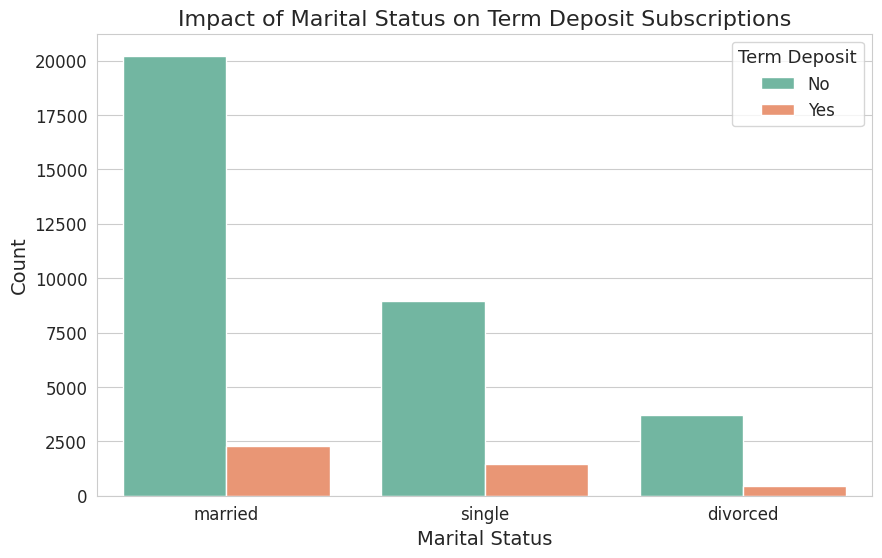

In [9]:
sns.set_style("whitegrid")





plt.figure(figsize=(10, 6))





sns.countplot(data=bank_data, x='marital', hue='y', palette='Set2')





plt.title('Impact of Marital Status on Term Deposit Subscriptions', fontsize=16)

plt.xlabel('Marital Status', fontsize=14)

plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)

plt.legend(title='Term Deposit', title_fontsize='13', labels=['No', 'Yes'], fontsize=12)





plt.show()

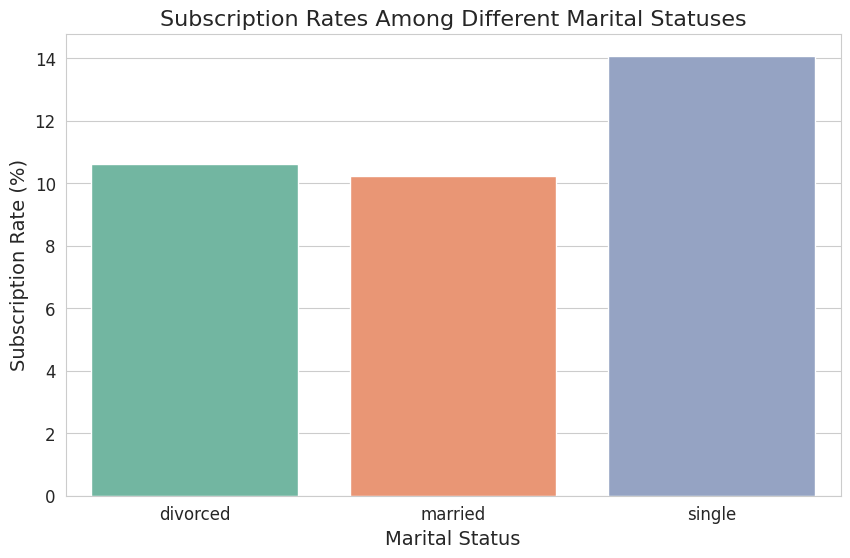

(None,
     marital  Subscription Rate (%)
 0  divorced              10.619255
 1   married              10.228635
 2    single              14.073007)

In [10]:
marital_subscription_rate = bank_data.groupby('marital')['y'].value_counts(normalize=True).unstack().fillna(0)
marital_subscription_rate['Subscription Rate (%)'] = marital_subscription_rate['yes'] * 100


plt.figure(figsize=(10, 6))
sns.barplot(x=marital_subscription_rate.index, y=marital_subscription_rate['Subscription Rate (%)'], palette='Set2', hue=marital_subscription_rate.index)


plt.title('Subscription Rates Among Different Marital Statuses', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Subscription Rate (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show(), marital_subscription_rate['Subscription Rate (%)'].reset_index()


### Explaining the Results:

#### Observations:
- **Single Clients**: Exhibit the highest subscription rate, approximately **14.07%**, significantly higher than other groups.
- **Divorced** and **Married Clients**: Present similar subscription rates of around **10.62%** and **10.23%**, respectively.

#### Insights & Implications:
- **Single Clients**: 
    - **Insight**: The elevated subscription rate among single clients might indicate distinct financial planning or risk tolerance within this demographic.
        - This could be due to the fact that single clients have less financial responsibilities and are more willing to take risks.
    - **Implication**: Tailoring offerings and communication to the needs and preferences of single clients and especially students could enhance engagement and conversion.
    
- **Married and Divorced Clients**: 
    - **Insight**: The parallel and relatively lower subscription rates indicate that marital stability and possible age play a role in financial decisions, such as committing to term deposits.
    - **Implication**: Marketing efforts should be tailored to the needs and preferences of married and divorced clients, which could be different from those of single clients.


## Question 2: Does contacting people too frequently for these marketing campaigns have an adverse effect on the outcome?

y,Campaign (No. of Contacts),Subscription Rate (%)
0,1,13.134686
1,2,11.387900
2,3,11.032473
3,4,9.503785
4,5,7.611732
5,6,7.836257
6,7,6.618962
7,8,4.132231
8,9,6.415094
9,10,5.314010


/tmp/ipykernel_141513/271380525.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_subscription_rate.index, y=campaign_subscription_rate['Subscription Rate (%)'], palette='viridis')


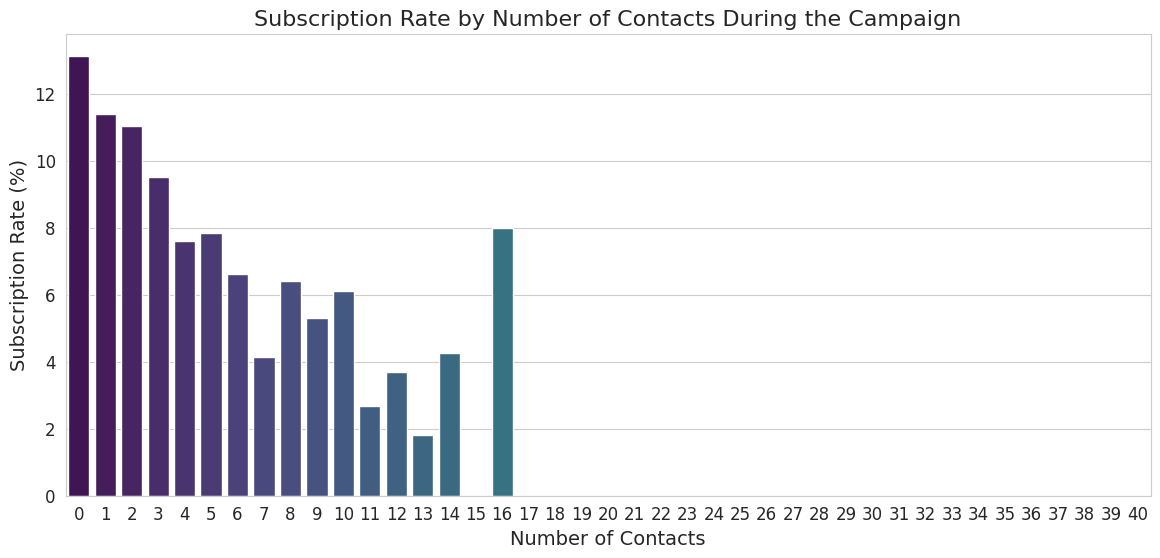

(None,
    index  Subscription Rate (%)
 0      0              13.134686
 1      1              11.387900
 2      2              11.032473
 3      3               9.503785
 4      4               7.611732
 5      5               7.836257
 6      6               6.618962
 7      7               4.132231
 8      8               6.415094
 9      9               5.314010)

In [11]:
campaign_subscription_rate = bank_data.groupby('campaign')['y'].value_counts(normalize=True).unstack().fillna(0)
campaign_subscription_rate['Subscription Rate (%)'] = campaign_subscription_rate['yes'] * 100


campaign_subscription_rate.reset_index(inplace=True)
campaign_subscription_rate.rename(columns={'campaign': 'Campaign (No. of Contacts)'}, inplace=True)


display(campaign_subscription_rate.head(10)[['Campaign (No. of Contacts)', 'Subscription Rate (%)']])




plt.figure(figsize=(14, 6))

sns.barplot(x=campaign_subscription_rate.index, y=campaign_subscription_rate['Subscription Rate (%)'], palette='viridis')





plt.title('Subscription Rate by Number of Contacts During the Campaign', fontsize=16)

plt.xlabel('Number of Contacts', fontsize=14)

plt.ylabel('Subscription Rate (%)', fontsize=14)

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)





plt.show(), campaign_subscription_rate['Subscription Rate (%)'].head(10).reset_index()  




### Explaining the Results: The Delicate Balance of Client Contact

#### **1. Insight into Client Patience:**
The analysis reveals a noteworthy pattern: as the number of contacts (`campaign`) during the campaign increases, the subscription rate to term deposits generally decreases. This implies thar customers have some level of patience or tolerance, which, when exceeded, might deters them from subscribing. 

#### **2. Tapping into the Sweet Spot:**
The highest subscription rate is witnessed when clients are contacted once, suggesting that the first contact might be the most effective in terms of getting positive responses. However, as further contacts are made, the efficacy appears to dip, indicating that further contacts might be perceived as annpying or intrusive, potentially negatively influencing the client’s feeling about subscribing.

#### **3. Balancing Act in Client Communication:**
Striking a balance in client communication becomes paramount. While the aim is to keep clients informed and engaged, over-communication, as evidenced by the declining subscription rates with increased contacts, can be counterproductive. For this reason, the bank should consider the optimal number of contacts to maximize the likelihood of subscription, while minimizing the risk of client annoyance or disengagement. From the analysis, it appears that the sweet spot is around 2-3 contacts, after which the subscription rate begins to decline noticeably.


## Question 3: How do variations in economic indicators (like employment variation rate, consumer price index, consumer confidence index, Euribor 3 month rate, and number of employees) correlate with the subscription to a term deposit?

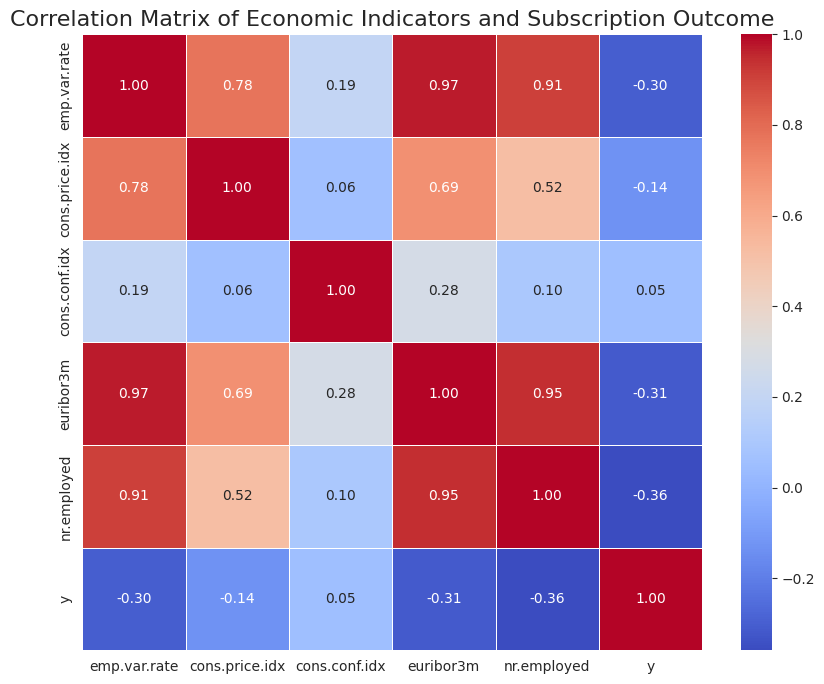

In [12]:
economic_indicators = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']



bank_data_corr = bank_data.copy()
bank_data_corr['y'] = np.where(bank_data_corr['y'] == 'yes', 1, 0)


variables_of_interest = economic_indicators + ['y']


correlation_matrix = bank_data_corr[variables_of_interest].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")


plt.title('Correlation Matrix of Economic Indicators and Subscription Outcome', fontsize=16)


plt.show()


### Explaining the Results: Economic Indicators and Subscription Outcomes

#### Quick Introduction to Economic Indicators
- **Employment Variation Rate**: Quarterly indicator measuring the change in the number of employed people.
- **Consumer Price Index**: Monthly indicator measuring the change in the price of goods and services.
- **Consumer Confidence Index**: Monthly indicator measuring the level of optimism that consumers have about the performance of the economy.
- **Euribor 3 Month Rate**: Daily indicator measuring the interest rate at which a large European bank can borrow funds.
- **Number of Employees**: Quarterly indicator measuring the number of employees in thousands.

#### **1. Economic Indicators**

Economic indicators, such as the employment variation rate, Euribor 3 month rate, and the number of employees, do not operate in isolation. They are related and responsive to each other, as is shown by their significant correlations. For instance, the strong positive correlation between `emp.var.rate` and `euribor3m` suggests that they are synchronized in some way, likely reflecting shifts in economic policies or global economic conditions.
   
   
#### **2. The Effect of Economics on Decisions**
While the correlations between economic indicators and subscription outcomes aren't particularly strong, there is clearly a hint of some influence from the economic context on subscription outcomes. For instance, the negative correlations between `emp.var.rate`, `euribor3m`, and subscription outcomes imply that as these indicators rise, the likelihood of clients subscribing to term deposits reduces, potentially signaling greater financial caution or different investment strategies among clients during these economic periods.

This implies that the bank should consider the economic situation when crafting client engagement strategies, as it could influence client behavior and decisions. For instance, during periods of economic uncertainty, clients might be more cautious and less likely to subscribe to term deposits, which could be a factor to consider.




# Feature Engineering

In [13]:
age_bins = [0, 30, 40, 50, 60, 70, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70+']
bank_data['age_group'] = pd.cut(bank_data['age'], bins=age_bins, labels=age_labels, right=False)


bank_data['total_communication'] = bank_data['campaign'] + bank_data['previous']


month_to_season = {
    'mar': 'spring', 'apr': 'spring', 'may': 'spring',
    'jun': 'summer', 'jul': 'summer', 'aug': 'summer',
    'sep': 'fall', 'oct': 'fall', 'nov': 'fall',
    'dec': 'winter', 'jan': 'winter', 'feb': 'winter'
}
bank_data['season'] = bank_data['month'].map(month_to_season)

bank_data['economic_stability'] = bank_data[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].mean(axis=1)


bank_data['is_weekend'] = bank_data['day_of_week'].apply(lambda x: 1 if x in ['sat', 'sun'] else 0)




bank_data['economic_stress_index'] = bank_data[['euribor3m', 'cons.conf.idx']].mean(axis=1)


bank_data['is_student'] = bank_data['job'].apply(lambda x: 1 if x == 'student' else 0)


bank_data['is_retired'] = bank_data['job'].apply(lambda x: 1 if x == 'retired' else 0)


bank_data['is_married'] = bank_data['marital'].apply(lambda x: 1 if x == 'married' else 0)


bank_data['is_educated'] = bank_data['education'].apply(lambda x: 1 if x in ['university.degree', 'high.school'] else 0)


bank_data['is_employed'] = bank_data['job'].apply(lambda x: 1 if x in ['student', 'retired', 'unemployed'] else 0)



# Creating the Model

In [14]:
X = bank_data.drop(columns='y')
y = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)  


numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


model = Pipeline(steps=[('preprocessor', preprocessor)])


X_preprocessed = model.fit_transform(X)


X_train, X_temp, y_train, y_temp = train_test_split(X_preprocessed, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)


(X_train.shape, X_val.shape, X_test.shape), (y_train.shape, y_val.shape, y_test.shape)


(((25948, 72), (5560, 72), (5561, 72)), ((25948,), (5560,), (5561,)))

### Summary: Data Preparation for Neural Network Model


#### **Key Steps and Considerations:**

1. **Separation of Variables:**
   - Isolated **features** ($X$) and the **target variable** ($y$).
   - Transformed the target variable $y$ into a binary format: "yes" as 1 and "no" as 0.

2. **Data Type Recognition:**
   - Categorized columns into **numerical** and **categorical** based on their data types.

3. **Preprocessing Mechanisms:**
   - **Numerical Data:**
     - Employed **Imputation** to substitute missing values with column means.
     - Used **Standardization** to scale numerical features, optimizing the neural network training.
   - **Categorical Data:**
     - Utilized **Imputation** to replace missing entries with the most common category per column.
     - Executed **One-Hot Encoding** to mold categorical variables into a machine learning friendly format.

4. **Data Segmentation:**
   - Separated data into **training**, **validation**, and **test** subsets to support model training, tuning, and evaluation.
   - Used a 70-15-15 partition ratio for the training, validation, and test sets.

5. **Data Form Validation:**
   - Confirmed the shapes of the processed data subsets to ensure model compatibility:
     - Training Data: 25,948 samples.
     - Validation Data: 5,560 samples.
     - Test Data: 5,561 samples.


![DNN Visualization](visuals/DNN_visual.gif)

![Simple Visualization](visuals/simple_NN_visual.gif)

![Perceptron Visualization](visuals/perceptron_visual.png)

![Activation Functions](visuals/activation_functions.png) 




In [15]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


model = Sequential([
    Dense(8192, activation='relu', input_shape=(X_train.shape[1],)),

    Dense(4096, activation='relu'),

    Dense(2048, activation='relu'),

    Dense(1024, activation='relu'),

    Dense(512, activation='relu'),

    Dense(256, activation='relu'),

    Dense(128, activation='relu'),

    Dense(64, activation='relu'),

    Dense(32, activation='relu'),
    
    Dense(1, activation='sigmoid')
])


def lr_schedule(epoch):
    lr = 0.001  
    if epoch > 5:
        lr = 0.0001  
    return lr


lr_scheduler = LearningRateScheduler(lr_schedule)


model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(
    min_delta=0.001,  
    patience=5,  
    restore_best_weights=True,
    monitor='val_loss',  
    mode='min'  
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    callbacks=[early_stopping, lr_scheduler],
    batch_size=2048,
)


test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)


print('\nTest accuracy:', test_acc)


2023-10-14 21:06:07.251689: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-14 21:06:07.283970: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-14 21:06:07.284013: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-14 21:06:07.288492: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-14 21:06:07.288528: I tensorflow/compile

Epoch 1/100


2023-10-14 21:06:11.790342: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-14 21:06:12.262755: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3402e4a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-14 21:06:12.262802: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2023-10-14 21:06:12.268245: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-14 21:06:12.427352: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-10-14 21:06:12.495055: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 [==============================] - 6s 126ms/step - loss: 0.4223 - accuracy: 0.8286 - val_loss: 0.3033 - val_accuracy: 0.8858 - lr: 0.0010
Epoch 2/100
13/13 [==============================] - 1s 104ms/step - loss: 0.2915 - accuracy: 0.8928 - val_loss: 0.2824 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 3/100
13/13 [==============================] - 1s 100ms/step - loss: 0.2792 - accuracy: 0.8998 - val_loss: 0.2804 - val_accuracy: 0.8995 - lr: 0.0010
Epoch 4/100
13/13 [==============================] - 1s 94ms/step - loss: 0.2766 - accuracy: 0.9012 - val_loss: 0.2831 - val_accuracy: 0.8987 - lr: 0.0010
Epoch 5/100
13/13 [==============================] - 1s 94ms/step - loss: 0.2725 - accuracy: 0.9012 - val_loss: 0.2826 - val_accuracy: 0.8998 - lr: 0.0010
Epoch 6/100
13/13 [==============================] - 1s 94ms/step - loss: 0.2696 - accuracy: 0.9027 - val_loss: 0.2799 - val_accuracy: 0.8969 - lr: 0.0010
Epoch 7/100
13/13 [==============================] - 1s 104ms/step - loss: 0.26

In [19]:
print('\nTest accuracy:', test_acc)

val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)
print('\nValidation accuracy:', val_acc)
print('\nValidation loss:', val_loss)


Test accuracy: 0.9030749797821045
174/174 - 1s - loss: 0.2793 - accuracy: 0.8998 - 685ms/epoch - 4ms/step

Validation accuracy: 0.8998201489448547

Validation loss: 0.2793352007865906


In [20]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")


print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)

  1/174 [..............................] - ETA: 2s

174/174 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

          No       0.91      0.99      0.95      4966
         Yes       0.65      0.20      0.31       595

    accuracy                           0.90      5561
   macro avg       0.78      0.59      0.63      5561
weighted avg       0.88      0.90      0.88      5561

Confusion Matrix: 
 [[4902   64]
 [ 475  120]]


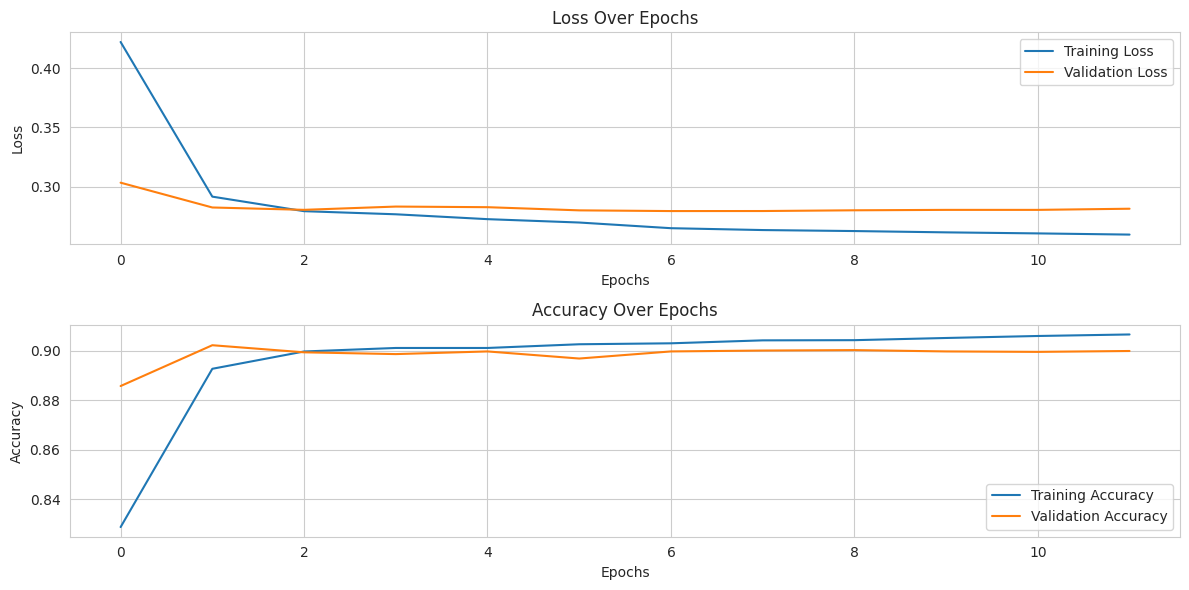

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(211)
plt.title('Loss Over Epochs')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(212)
plt.title('Accuracy Over Epochs')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.show()